# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [23]:
import os
import keras
import itertools

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [24]:
train, test = keras.datasets.cifar10.load_data()

In [25]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [26]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [27]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)

    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])    
    return model

In [28]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 10
BATCH_SIZE = 256
OPTIMIZER = [keras.optimizers.SGD, keras.optimizers.RMSprop, keras.optimizers.Adagrad, keras.optimizers.Adam]

In [30]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr, opti in itertools.product(LEARNING_RATE, OPTIMIZER):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f, Optimizer = %s" % (lr, str(opti)))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    
    optimizer = opti(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s-optimizer-%s" % (str(lr), str(opti))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000, Optimizer = <class 'keras.optimizers.SGD'>
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 24s 488us/step - loss: 457.3711 - accuracy: 0.0994 - val_loss: 2.3038 - val_accuracy: 0.1000
Epoch 2/10
50000/50000 [==============================] - 24s 478us/step - loss: 2.3039 - accuracy: 0.0996 - val_loss: 2.3042 - val_accuracy: 0.1000
Epoch 3/10
50000/50000 [==============================] - 27s 544us/step - loss: 2.3043 - accuracy: 0.1018 - val_loss: 2.3035 - val_accuracy: 0.1000
Epoch 4/10
50000/50000 [==============================] - 29s 576us/step - loss: 2.3044 - accuracy: 0.1001 - val_loss: 2.3052 - val_accuracy: 0.1000
Epoch 5/10
50000/50000 [==============================] - 28s 564us/step - loss: 2.3054 - accuracy: 0.1012 - val_loss: 2.3062 - val_accuracy: 0.1000
Epoch 6/10
50000/50000 [==============================] - 30s 601us/step - loss: 2.3054 - accuracy: 0.1018 - val_loss: 2.3046 - val_accuracy: 0.1000
Epoch 7/10
50000/50000 [==============================

50000/50000 [==============================] - 31s 613us/step - loss: 1.8280 - accuracy: 0.3453 - val_loss: 1.8918 - val_accuracy: 0.3467
Epoch 3/10
50000/50000 [==============================] - 30s 598us/step - loss: 1.7336 - accuracy: 0.3804 - val_loss: 1.7181 - val_accuracy: 0.3799
Epoch 4/10
50000/50000 [==============================] - 31s 610us/step - loss: 1.6751 - accuracy: 0.4021 - val_loss: 1.7610 - val_accuracy: 0.3625
Epoch 5/10
50000/50000 [==============================] - 32s 646us/step - loss: 1.6321 - accuracy: 0.4203 - val_loss: 1.6609 - val_accuracy: 0.4032
Epoch 6/10
50000/50000 [==============================] - 29s 590us/step - loss: 1.5910 - accuracy: 0.4356 - val_loss: 1.6334 - val_accuracy: 0.4117
Epoch 7/10
50000/50000 [==============================] - 32s 645us/step - loss: 1.5606 - accuracy: 0.4457 - val_loss: 1.7402 - val_accuracy: 0.3796
Epoch 8/10
50000/50000 [==============================] - 32s 632us/step - loss: 1.5363 - accuracy: 0.4554 - val_loss

50000/50000 [==============================] - 27s 533us/step - loss: 1.7140 - accuracy: 0.3844 - val_loss: 1.9206 - val_accuracy: 0.3533
Epoch 5/10
50000/50000 [==============================] - 28s 554us/step - loss: 1.6537 - accuracy: 0.4092 - val_loss: 1.6867 - val_accuracy: 0.4008
Epoch 6/10
50000/50000 [==============================] - 26s 525us/step - loss: 1.6095 - accuracy: 0.4249 - val_loss: 1.5970 - val_accuracy: 0.4306
Epoch 7/10
50000/50000 [==============================] - 25s 509us/step - loss: 1.5731 - accuracy: 0.4390 - val_loss: 1.8281 - val_accuracy: 0.3857
Epoch 8/10
50000/50000 [==============================] - 26s 514us/step - loss: 1.5338 - accuracy: 0.4515 - val_loss: 1.6009 - val_accuracy: 0.4186
Epoch 9/10
50000/50000 [==============================] - 26s 511us/step - loss: 1.5028 - accuracy: 0.4641 - val_loss: 1.5581 - val_accuracy: 0.4467
Epoch 10/10
50000/50000 [==============================] - 25s 508us/step - loss: 1.4711 - accuracy: 0.4744 - val_los

50000/50000 [==============================] - 22s 433us/step - loss: 2.2660 - accuracy: 0.1483 - val_loss: 2.2617 - val_accuracy: 0.1484
Epoch 7/10
50000/50000 [==============================] - 22s 435us/step - loss: 2.2567 - accuracy: 0.1553 - val_loss: 2.2529 - val_accuracy: 0.1545
Epoch 8/10
50000/50000 [==============================] - 20s 408us/step - loss: 2.2482 - accuracy: 0.1631 - val_loss: 2.2447 - val_accuracy: 0.1644
Epoch 9/10
50000/50000 [==============================] - 23s 464us/step - loss: 2.2403 - accuracy: 0.1711 - val_loss: 2.2372 - val_accuracy: 0.1725
Epoch 10/10
50000/50000 [==============================] - 23s 464us/step - loss: 2.2329 - accuracy: 0.1788 - val_loss: 2.2300 - val_accuracy: 0.1796
Experiment with LR = 0.000100, Optimizer = <class 'keras.optimizers.RMSprop'>
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 30

50000/50000 [==============================] - 28s 567us/step - loss: 1.4369 - accuracy: 0.4957 - val_loss: 1.4802 - val_accuracy: 0.4765
Epoch 9/10
50000/50000 [==============================] - 26s 522us/step - loss: 1.4111 - accuracy: 0.5037 - val_loss: 1.4565 - val_accuracy: 0.4822
Epoch 10/10
50000/50000 [==============================] - 26s 527us/step - loss: 1.3850 - accuracy: 0.5131 - val_loss: 1.4228 - val_accuracy: 0.4975
Experiment with LR = 0.000010, Optimizer = <class 'keras.optimizers.SGD'>
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
__________

50000/50000 [==============================] - 25s 508us/step - loss: 2.1282 - accuracy: 0.2535 - val_loss: 2.1215 - val_accuracy: 0.2572
Experiment with LR = 0.000010, Optimizer = <class 'keras.optimizers.Adam'>
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,

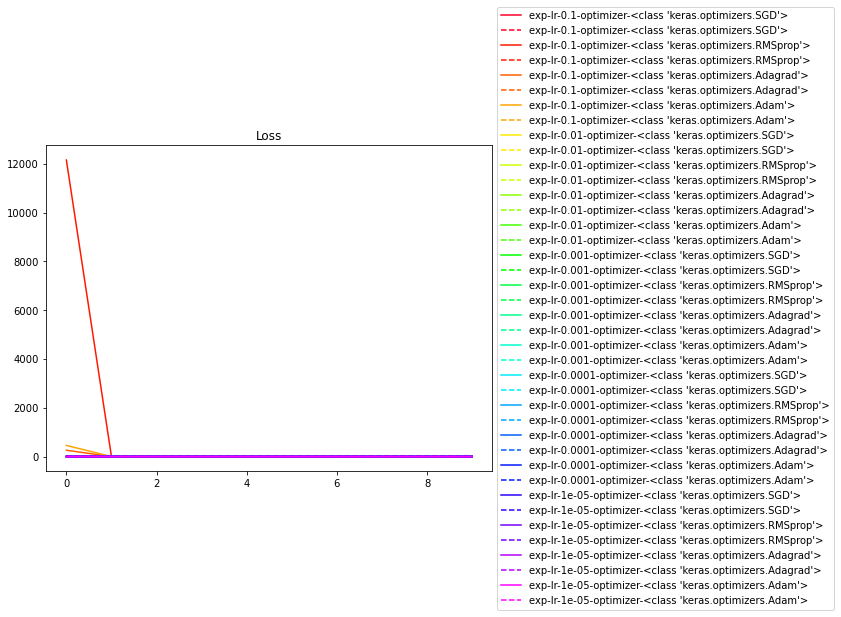

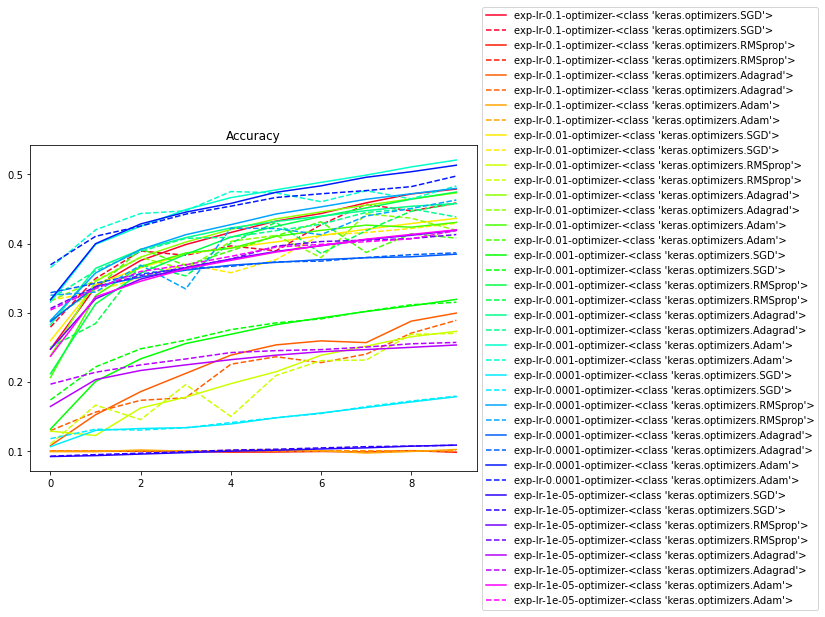

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()